In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle

In [44]:
dataset = pd.read_csv("/content/drive/MyDrive/CSV_Files/Stroke.csv")
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [46]:
dataset.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [47]:
dataset['stroke'].unique()

array([1, 0])

In [48]:
dataset['avg_glucose_level']=='...'

,avg_glucose_level
0,False
1,False
2,False
3,False
4,False
...,...
5105,False
5106,False
5107,False
5108,False


In [49]:
dataset['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [50]:
dataset['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [51]:
dataset['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [52]:
dataset['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [53]:
dataset['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [54]:
dataset['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [55]:
encoder = OrdinalEncoder()
encoder1 = OrdinalEncoder()
encoder2 = OrdinalEncoder()
encoder3 = OrdinalEncoder()
encoder4 = OrdinalEncoder()

In [56]:
dataset['gender'] = encoder.fit_transform(dataset[['gender']])
dataset['gender'].unique()

array([1., 0., 2.])

In [57]:
dataset['ever_married'] = encoder1.fit_transform(dataset[['ever_married']])
dataset['ever_married'].unique()

array([1., 0.])

In [58]:
dataset['work_type'] = encoder2.fit_transform(dataset[['work_type']])
dataset['work_type'].unique()

array([2., 3., 0., 4., 1.])

In [59]:
dataset['Residence_type'] = encoder3.fit_transform(dataset[['Residence_type']])
dataset['Residence_type'].unique()

array([1., 0.])

In [60]:
dataset['smoking_status'] = encoder4.fit_transform(dataset[['smoking_status']])
dataset['smoking_status'].unique()

array([1., 2., 3., 0.])

In [61]:
dataset = dataset[dataset['bmi'].notna()]

In [62]:
dataset['bmi'].unique()

array([36.6, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8, 27.3,
       28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5, 28.3,
       44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9, 28.5,
       26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8, 40.4,
       25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. , 24.1,
       45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2, 29.4,
       24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1, 31.3,
       31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8, 21.8,
       27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2, 23.6,
       22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. , 42.5,
       35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. , 28.6,
       42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4, 40.5,
       36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. , 22. ,
       39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23.7, 24

In [63]:
dataset['age'] = dataset['age'].astype(int)

/tmp/ipython-input-1358350546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['age'] = dataset['age'].astype(int)


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   float64
 2   age                4909 non-null   int64  
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   float64
 6   work_type          4909 non-null   float64
 7   Residence_type     4909 non-null   float64
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   float64
 11  stroke             4909 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 498.6 KB


In [65]:
dataset['age'].unique()

array([67, 80, 49, 79, 81, 74, 69, 78, 61, 54, 50, 64, 75, 60, 71, 52, 82,
       65, 57, 42, 48, 72, 58, 76, 39, 77, 63, 73, 56, 45, 70, 59, 66, 43,
       68, 47, 53, 38, 55, 46, 32, 51, 14,  3,  8, 37, 40, 35, 20, 44, 25,
       27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 36,  0, 34,
       41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10,  1, 19,  6])

In [66]:
dataset['gender'].unique()

array([1., 0., 2.])

In [67]:
dataset.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.007065,0.008963,0.001147,0.004016,0.016841,-0.022644,0.004978,0.006409,0.003084,0.018482,0.004839
gender,0.007065,1.000000,-0.030823,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,0.008963,-0.030823,1.000000,0.274329,0.256999,0.680834,-0.367481,0.010942,0.235725,0.333738,0.275902,0.232221
hypertension,0.001147,0.021578,0.274329,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.004016,0.082712,0.256999,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,0.016841,-0.037237,0.680834,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,-0.022644,0.058560,-0.367481,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,0.004978,-0.005014,0.010942,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.006409,0.053664,0.235725,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,0.003084,-0.026678,0.333738,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374


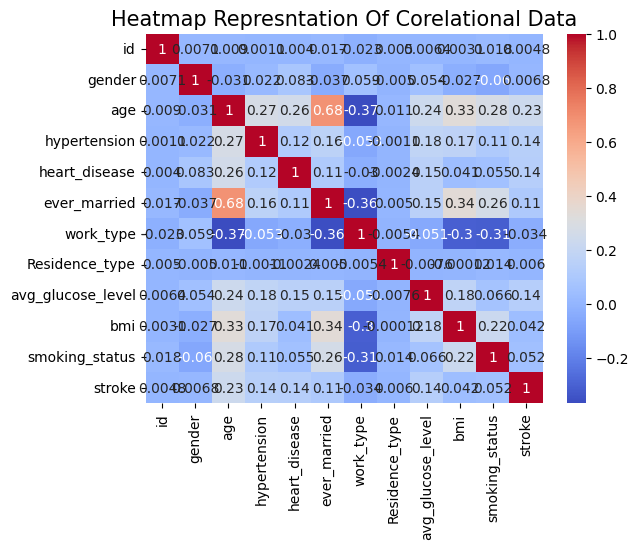

In [68]:
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Represntation Of Corelational Data", fontsize=15)
plt.show()

In [69]:
Y = dataset['stroke']
X = dataset[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Dicission Tree Classification (DTC)

In [71]:
model = DecisionTreeClassifier()

In [72]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
model_pred = model.predict(x_test)
model_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [74]:
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       929
           1       0.19      0.15      0.17        53

    accuracy                           0.92       982
   macro avg       0.57      0.56      0.56       982
weighted avg       0.91      0.92      0.92       982



In [75]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
2,31112,1.0,80,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,60182,0.0,49,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,1665,0.0,79,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
5,56669,1.0,81,0,0,1.0,2.0,1.0,186.21,29.0,1.0,1


In [76]:
param = [[1,67.0,0,1,1,2,1,228.69,36.6,1]]

In [77]:
model.predict(param)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Linear Regression Classifier (LRC)

In [78]:
lreg=LogisticRegression()
lreg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
lreg_pred=lreg.predict(x_test)
lreg.predict(param)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [80]:
print(classification_report(y_test, lreg_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classifier (RFC)

In [81]:
rfc_model=RandomForestClassifier()
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
rfc_pred=rfc_model.predict(x_test)
rfc_model.predict(param)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [83]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
with open("rfc_model.pkl", "wb") as file:
    pickle.dump(rfc_model, file)